In [8]:
import json

In [9]:
# Reading the JSON files
training_challenges_file = './arc-agi_training_challenges.json'
training_solutions_file = './arc-agi_training_solutions.json'

def read_json_file(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

X_data = read_json_file(training_challenges_file)
y_data = read_json_file(training_solutions_file)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


In [11]:
class Plotter():
    def __init__(self, data):
        all_values = np.concatenate([np.array(example['input']).flatten() for example in data] +
                                [np.array(example['output']).flatten() for example in data])

        self.vmin = all_values.min()
        self.vmax = all_values.max()
        self.norm = Normalize(vmin=self.vmin, vmax=self.vmax)
        self.data = data

    def plot_data(self, data=None):
        if data is None:
            data = self.data

        for idx, example in enumerate(data):
            input_array = np.array(example['input'])
            output_array = np.array(example['output'])

            fig, axes = plt.subplots(1, 2, figsize=(10, 5))

            im1 = axes[0].imshow(input_array, cmap='seismic', interpolation='nearest', norm=self.norm)
            axes[0].set_title('Input')

            im2 = axes[1].imshow(output_array, cmap='seismic', interpolation='nearest', norm=self.norm)
            axes[1].set_title('Output')

            # Annotate input array with numerical values
            for i in range(input_array.shape[0]):
                for j in range(input_array.shape[1]):
                    color = 'black' if input_array[i, j] > (self.vmax - self.vmin) / 2 else 'white'
                    axes[0].text(j, i, input_array[i, j], ha='center', va='center', color=color)

            # Annotate output array with numerical values
            for i in range(output_array.shape[0]):
                for j in range(output_array.shape[1]):
                    color = 'black' if output_array[i, j] > (self.vmax - self.vmin) / 2 else 'white'
                    axes[1].text(j, i, output_array[i, j], ha='center', va='center', color=color)

            plt.show()

    def plot_entities_with_consistent_colors(self, entities, cmap='seismic'):
        for color, entity_list in entities.items():
            for entity_idx, entity in enumerate(entity_list):
                # Create a new plot for each entity
                fig, ax = plt.subplots()
                entity_array = np.zeros((7, 7))  # Adjust size as needed

                for (x, y) in entity:
                    entity_array[x, y] = color

                # Plot entity with consistent colors and normalization
                im = ax.imshow(entity_array, cmap=cmap, norm=self.norm, interpolation='nearest')

                # Annotate the plot with the entity values
                for (x, y) in entity:
                    value = int(entity_array[x, y])
                    text_color = 'black' if value > (self.norm.vmax - self.norm.vmin) / 2 else 'white'
                    ax.text(y, x, value, ha='center', va='center', color=text_color)

                ax.set_title(f'Color {color} - Entity {entity_idx + 1}')
                plt.show()

    def plot_entity(self, coordinates):
        # Get grid size from the first example's input data
        if not self.data:
            raise ValueError("No data available to determine grid size.")

        input_array = np.array(self.data[0]['input'])
        grid_size = input_array.shape

        # Create a grid of zeros with the determined size
        grid = np.zeros(grid_size)

        # Mark the entity locations on the grid
        for (x, y) in coordinates:
            grid[x, y] = 1

        # Plot the grid with the marked entity locations
        fig, ax = plt.subplots(figsize=(5, 5))

        im = ax.imshow(grid, cmap='seismic', interpolation='nearest', norm=self.norm)
        ax.set_title('Entity Locations')

        # Annotate the grid with numerical values
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                color = 'black' if grid[i, j] > (self.vmax - self.vmin) / 2 else 'white'
                ax.text(j, i, int(grid[i, j]), ha='center', va='center', color=color)

        plt.show()

In [12]:
print(f"len of training challenges: {len(X_data.keys())}")
print(f"first three keys: {list(X_data.keys())[:3]}")
print(f"len of training solutions: {len(y_data.keys())}")
print(f"first three keys: {list(y_data.keys())[:3]}")

len of training challenges: 400
first three keys: ['007bbfb7', '00d62c1b', '017c7c7b']
len of training solutions: 400
first three keys: ['007bbfb7', '00d62c1b', '017c7c7b']


In [13]:
keys = list(X_data.keys())
# first_input = keys[0]
example_key = "3aa6fb7a"
example_X = X_data[example_key]

example_plotter = Plotter(example_X['train'])
# test_example = y_data[example_key]

print(f"example key: {example_key}")
print(train_examples.keys())
print("train has input, output; test only has input")

ppad("🥬 train")
example_X_train = example_X['train']
example_X_test = example_X['test']

print(example_X['train'])
for x in example_X['train']:
    print("🎒 input")
    print(x['input'])
    print("😎 output")
    print(x['output'])

ppad("🥬 test")
print(example_X['test'])
for x in example_X['test']:
    print("🎒 input")
    print(x['input'])

example key: 3aa6fb7a


NameError: name 'train_examples' is not defined

In [ ]:
print(example_X_train[0])


{'input': [[0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0], [0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'output': [[0, 0, 0, 0, 0, 0, 0], [0, 8, 1, 0, 0, 0, 0], [0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 1, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]}


single train plot


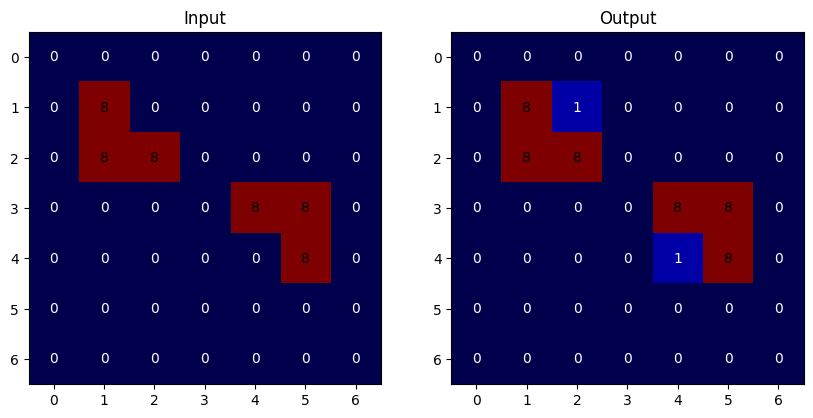

In [ ]:
print("single train plot")
example_plotter.plot_data(list([example_X_train[0]]))

all train plots
example count: 2
[{'input': [[0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0], [0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'output': [[0, 0, 0, 0, 0, 0, 0], [0, 8, 1, 0, 0, 0, 0], [0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 1, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]}, {'input': [[0, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 8, 0, 0, 0, 0], [0, 0, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 8, 8, 0, 0]], 'output': [[0, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 1, 8, 0], [0, 0, 8, 1, 0, 0, 0], [0, 0, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 8, 0, 0], [0, 0, 0, 8, 8, 0, 0]]}]


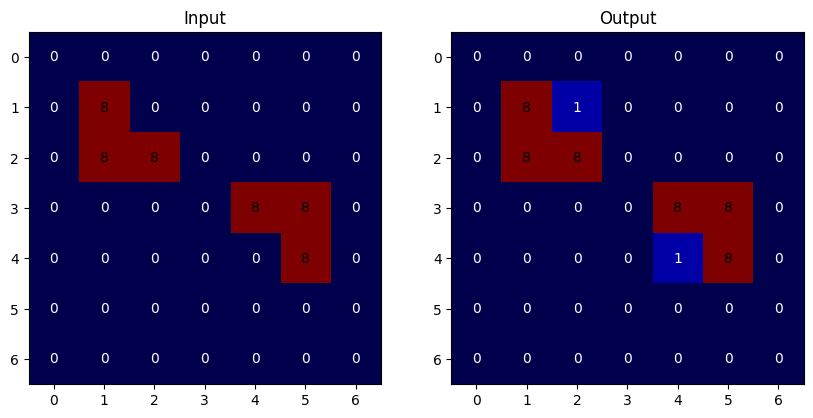

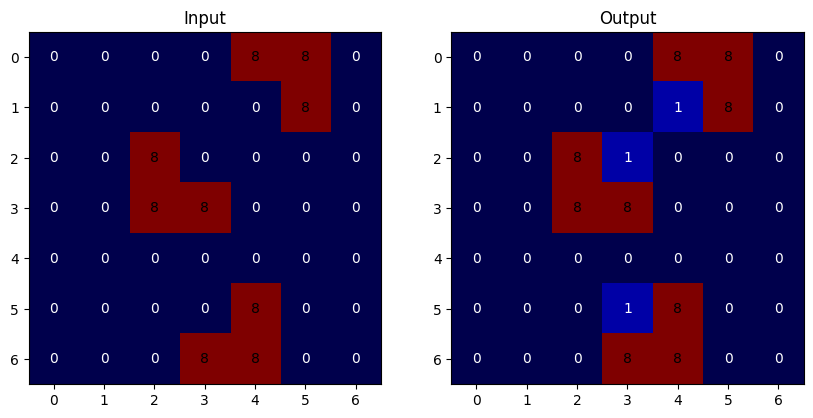

In [ ]:
print("all train plots")
print(f"example count: {len(example_X_train)}")
print(example_plotter.data)

example_plotter.plot_data()

In [ ]:
from collections import defaultdict

def get_neighbors(x, y, array, color_value):
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(array) and 0 <= ny < len(array[0]) and array[nx][ny] == color_value:
            neighbors.append((nx, ny))
    return neighbors

def find_entities(grid):
    def flood_fill(x, y, array, visited, color_value):
        stack = [(x, y)]
        entity = []
        while stack:
            cx, cy = stack.pop()
            if (cx, cy) not in visited:
                visited.add((cx, cy))
                entity.append((cx, cy))
                neighbors = get_neighbors(cx, cy, array, color_value)
                for neighbor in neighbors:
                    stack.append(neighbor)
        return entity

    flat_grid = [item for row in grid for item in row]
    unique_colors = set(flat_grid)

    visited = set()
    color_entities = defaultdict(list)

    for color in unique_colors:
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == color and (i, j) not in visited:
                    entity = flood_fill(i, j, grid, visited, color)
                    color_entities[color].append(entity)

    return color_entities

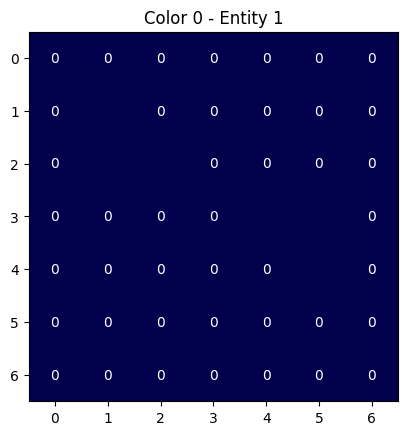

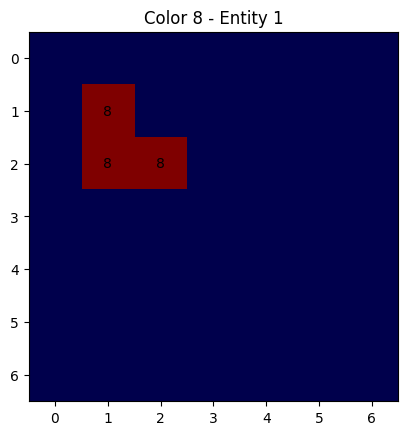

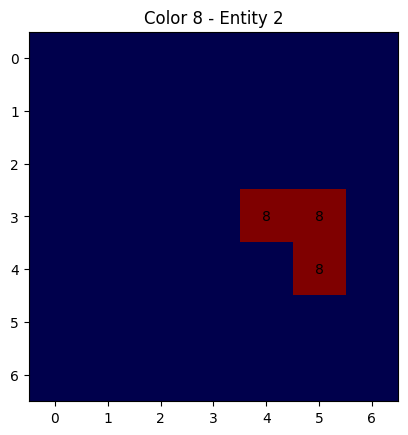

In [ ]:
_input = example_X_train[0]['input']
_output = example_X_train[0]['output']
_input_entities = find_entities(_input)


# Generate consistent normalization and plot entities
norm = plot_input_output(example_X_train)
plot_entities_with_consistent_colors(find_entities(_input), norm)

In [ ]:
def ents_match(e1, e2):
    """
    [(1, 1), (2, 1), (2, 2)], [(1, 1), (2, 1), (2, 2)] TRUE
    [(1, 1), (2, 1), (2, 2)], [(2, 2), (1, 1), (2, 1)] TRUE
    [(1, 1), (2, 1), (2, 2)], [(1, 1), (2, 1), (2, 8)] FALSE
    [(1, 1), (2, 1), (2, 2)], [(3, 4), (3, 5), (4, 5)] FALSE
    """
    if len(e1) != len(e2):
        return False

    return sorted(e1) == sorted(e2)

print(ents_match([(1, 1), (2, 1), (2, 2)], [(1, 1), (2, 1), (2, 2)]))
print(ents_match([(1, 1), (2, 1), (2, 2)], [(2, 2), (1, 1), (2, 1)]))
print(ents_match([(1, 1), (2, 1), (2, 2)], [(1, 1), (2, 1), (2, 8)]))

True
True
False


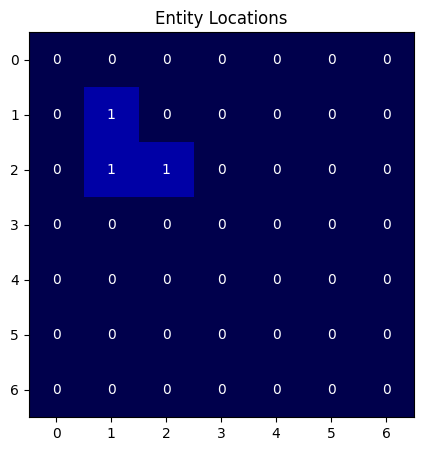

In [ ]:
# Original list of tuples
coordinates = [(1, 1), (2, 1), (2, 2)]
example_plotter.plot_entity(coordinates)

In [ ]:
def rotate_right(coordinates):
    # Step 1: Calculate the midpoint
    mid_x = sum(x for x, y in coordinates) / len(coordinates)
    mid_y = sum(y for x, y in coordinates) / len(coordinates)

    # Step 2: Translate, rotate, and then translate back
    rotated_coordinates = []
    for x, y in coordinates:
        # Translate to origin (midpoint)
        translated_x = x - mid_x
        translated_y = y - mid_y

        # Apply 90-degree clockwise rotation
        rotated_x = translated_y
        rotated_y = -translated_x

        # Translate back from origin (midpoint)
        final_x = rotated_x + mid_x
        final_y = rotated_y + mid_y

        rotated_coordinates.append((round(final_x), round(final_y)))

    return rotated_coordinates

rotated_coordinates = rotate_right(coordinates)
print(rotate_right(coordinates))

[(1, 2), (1, 1), (2, 1)]


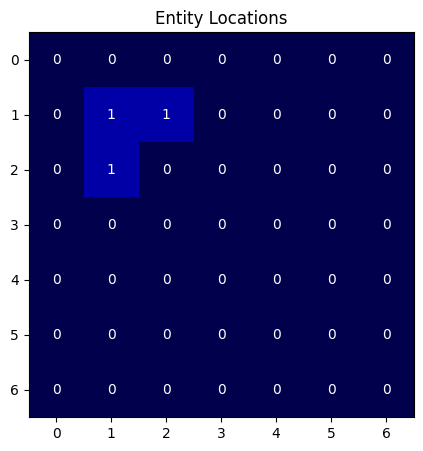

In [ ]:
example_plotter.plot_entity(rotated_coordinates)

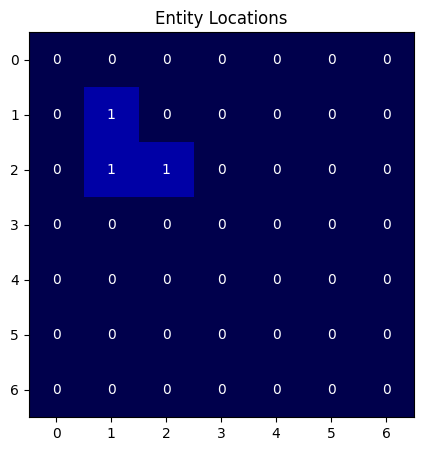

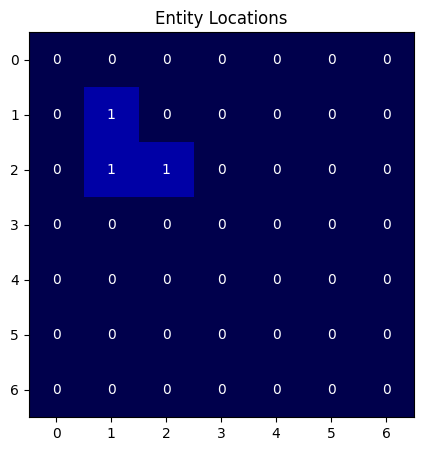

In [ ]:
def rotate_left(coordinates):
    # Step 1: Calculate the midpoint
    mid_x = sum(x for x, y in coordinates) / len(coordinates)
    mid_y = sum(y for x, y in coordinates) / len(coordinates)

    # Step 2: Translate, rotate, and then translate back
    rotated_coordinates = []
    for x, y in coordinates:
        # Translate to origin (midpoint)
        translated_x = x - mid_x
        translated_y = y - mid_y

        # Apply 90-degree counterclockwise rotation
        rotated_x = -translated_y
        rotated_y = translated_x

        # Translate back from origin (midpoint)
        final_x = rotated_x + mid_x
        final_y = rotated_y + mid_y

        rotated_coordinates.append((round(final_x), round(final_y)))

    return rotated_coordinates

# Example usage
unrotated_coordinates = rotate_left(rotated_coordinates)
example_plotter.plot_entity(unrotated_coordinates)
example_plotter.plot_entity(coordinates)

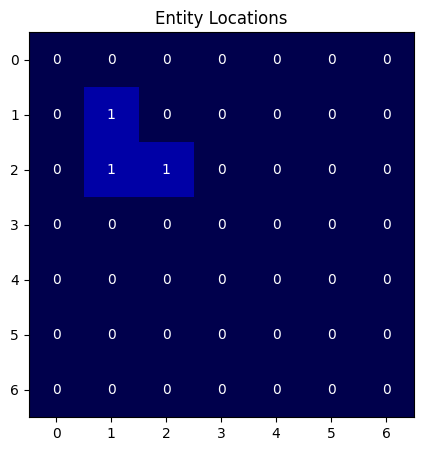

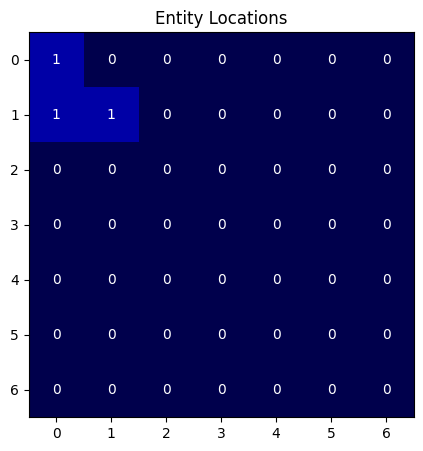


setting anchor
[(0, 0), (1, 0), (1, 1)]
[(0, 1)]


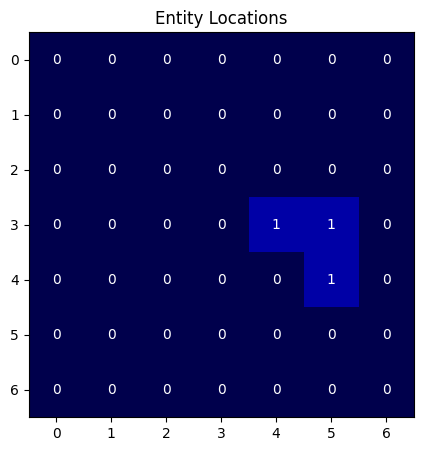

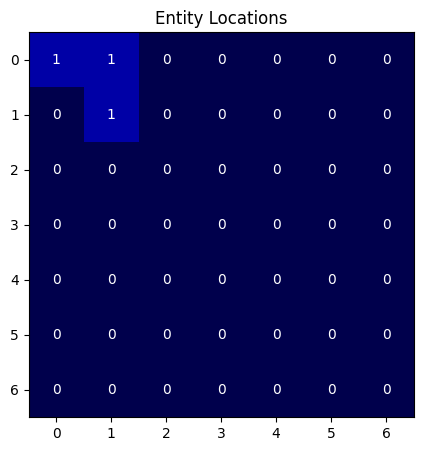


how many rotations until norm anchor? [(0, 0), (1, 0), (1, 1)]
🐶 current norm ent


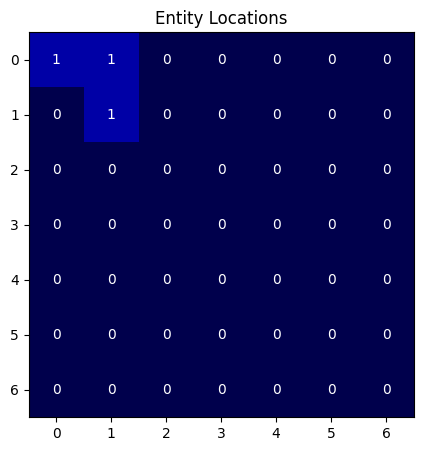

rotate right 1
[(0, 1), (1, 1), (1, 0)]
🌅 current norm ent rotated 1
does it match?


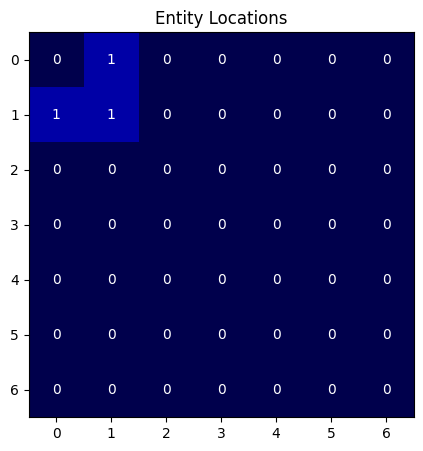

rotate right 2
[(1, 1), (1, 0), (0, 0)]
🌅 current norm ent rotated 2
does it match?


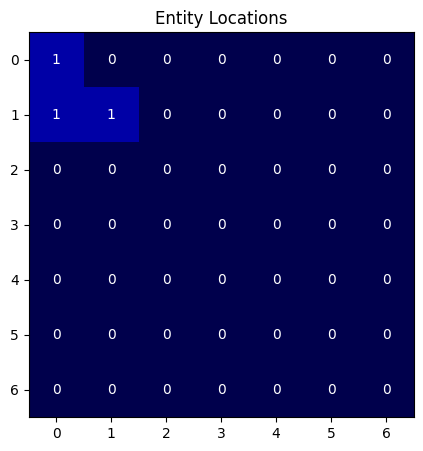

YES, stop rotating
------


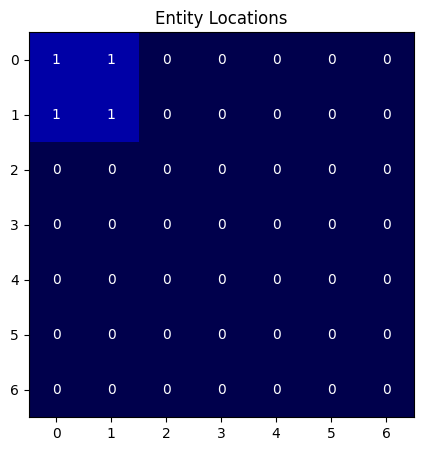

In [ ]:
def get_neighbors_positions(x, y, array, color_value):
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(array) and 0 <= ny < len(array[0]):
            neighbors.append((nx, ny))
    return neighbors


def get_new_neighbors(ent, _input, _output, color):
    results = []
    stack = ent.copy()
    original = set(stack)
    visited = set()

    while stack:
        # print("stack")
        # print(stack)
        x, y = stack.pop()
        if (x, y) not in visited:
            visited.add((x,y))

            if (x,y) not in original:
                results.append((x,y))

            # print(f"visiting {x}, {y}")
            neighbors_positions = get_neighbors_positions(x, y, _input, color)
            # print(f"neighbors_positions")
            # print(neighbors_positions)
            for neighbor_x, neighbor_y in neighbors_positions:
                input_value = _input[neighbor_x][neighbor_y]
                output_value = _output[neighbor_x][neighbor_y]
                # print(f"in_val={input_value} out_val{output_value}")
                if input_value != output_value and output_value != color:
                    stack.append((neighbor_x, neighbor_y))
    return results


def get_new_neighbors_of_entities(_input, _output, _input_entities):
    for ent_val in _input_entities:
        if ent_val != 0:
            # print(f"# entities for {ent_val}")
            anchor_ent = None
            norm_anchor_ent = None
            norm_anchor_neighbors = None

            for i, ent in enumerate(_input_entities[ent_val]):
                # print(f"ent {ent}")
                new_neighbors = get_new_neighbors(ent, _input, _output, ent_val)
                # print(f"new_neighbors: {new_neighbors}")
                example_plotter.plot_entity(ent)


                """
                I AM STUCK
                I AM STUCK
                I AM STUCK
                I AM STUCK
                I AM STUCK
                """
                # print("normalize ent across", ent + new_neighbors)
                min_x = min([x for (x,y) in ent + new_neighbors])
                # print(f"min_x={min_x}")
                min_y = min([y for (x,y) in ent + new_neighbors])
                # print(f"min_y={min_y}")

                norm_ent = []
                for x,y in ent:
                    norm_x, norm_y = x - min_x, y - min_y
                    # print(f"norm_x={norm_x} norm_y={norm_y}")
                    norm_ent.append((norm_x, norm_y))

                example_plotter.plot_entity(norm_ent)

                norm_neighbors = []
                for x,y in new_neighbors:
                    norm_x, norm_y = x - min_x, y - min_y
                    # print(f"neighbors -> norm_x={norm_x} norm_y={norm_y}")
                    norm_neighbors.append((norm_x, norm_y))
                print()

                if i == 0:
                    anchor_ent = ent.copy()
                    print("setting anchor")
                    norm_anchor_ent = norm_ent.copy()
                    print(norm_anchor_ent)
                    norm_anchor_neighbors = norm_neighbors.copy()
                    print(norm_anchor_neighbors)
                else:
                    print(f"how many rotations until norm anchor? {norm_anchor_ent}")
                    curr_coord = norm_ent.copy()
                    print("🐶 current norm ent")
                    example_plotter.plot_entity(curr_coord)
                    rotate_count = None
                    for i in range(1, 4):
                        print(f"rotate right {i}")
                        rotated_coordinates = rotate_right(curr_coord)
                        print(rotated_coordinates)
                        curr_coord = rotated_coordinates
                        print(f"🌅 current norm ent rotated {i}")
                        print("does it match?")
                        example_plotter.plot_entity(curr_coord)
                        if ents_match(norm_anchor_ent, curr_coord):
                            print("YES, stop rotating")
                            rotate_count = i
                            break
                    print("------")
                    norm_neighbors = norm_anchor_neighbors.copy()
                    example_plotter.plot_entity(curr_coord + norm_neighbors)
                    # get neighbor positions unnormalized but...
                    # they have to be attached...
                    # since rotation is the mid point of the entire shape...
                    # HOW?????
                    # HOW?????
                    # HOW?????
                    # HOW?????
                    for i in range(rotate_count):
                        rotate_left

_input = example_X_train[0]['input']
_output = example_X_train[0]['output']
_input_entities = find_entities(_input)
get_new_neighbors_of_entities(_input, _output, _input_entities)

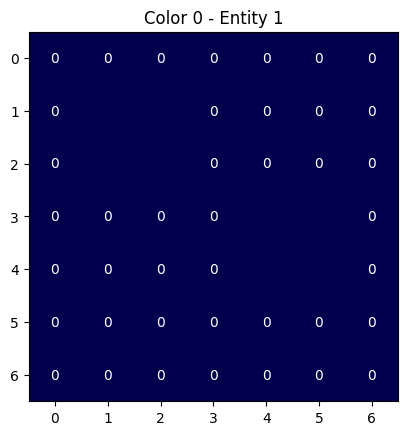

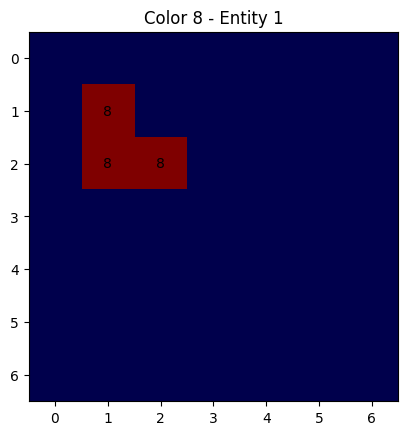

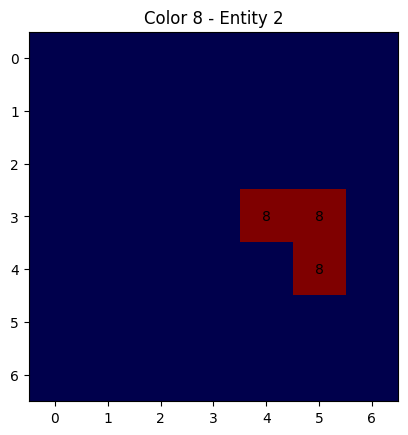

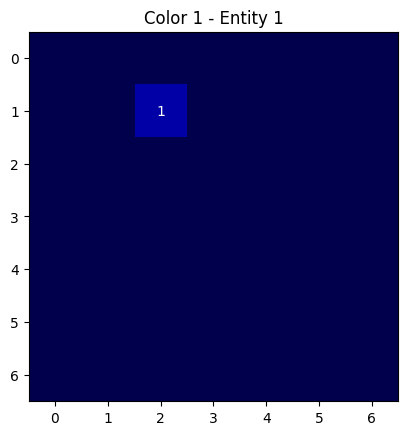

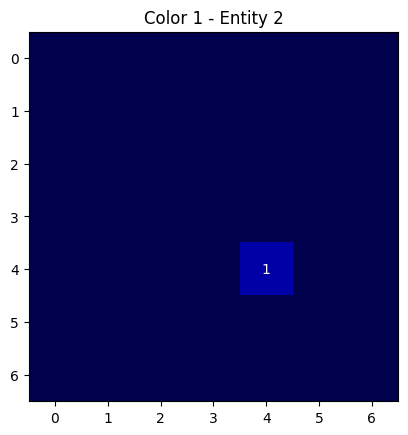

In [ ]:
plot_entities_with_consistent_colors(find_entities(_output), norm)

In [ ]:
def check_entities_unmoved(input_array, output_array):
    input_entities = find_entities(input_array)
    output_entities = find_entities(output_array)

    unmoved_entities = defaultdict(list)

    for color, input_entity_list in input_entities.items():
        output_entity_list = output_entities.get(color, [])

        input_entity_sets = [set(entity) for entity in input_entity_list]
        output_entity_sets = [set(entity) for entity in output_entity_list]

        for input_entity in input_entity_sets:
            if input_entity in output_entity_sets:
                unmoved_entities[color].append(input_entity)

    return unmoved_entities

# Check if the entities are unmoved
unmoved_entities = check_entities_unmoved(x, y)
for color, entities in unmoved_entities.items():
    print(f"Color {color} has unmoved entities:")
    for idx, entity in enumerate(entities):
        print(f"  Entity {idx + 1}: {entity}")

NameError: name 'y' is not defined

In [ ]:


# Plot the input and output
plot_input_output(X_data[first_input]['train'])

In [ ]:
key_1 = list(X_data.keys())[0]
plot_input_output(X_data[key_1]['train'])

In [ ]:
# Graveyard

In [ ]:


# # Function to plot input and output with numerical values
# def plot_input_output(data):
#     # Combine all values to find the global min and max for normalization
#     all_values = np.concatenate([np.array(example['input']).flatten() for example in data] +
#                                 [np.array(example['output']).flatten() for example in data])

#     vmin, vmax = all_values.min(), all_values.max()
#     norm = Normalize(vmin=vmin, vmax=vmax)

#     for idx, example in enumerate(data):
#         input_array = np.array(example['input'])
#         output_array = np.array(example['output'])

#         fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#         im1 = axes[0].imshow(input_array, cmap='seismic', interpolation='nearest', norm=norm)
#         axes[0].set_title('Input')

#         im2 = axes[1].imshow(output_array, cmap='seismic', interpolation='nearest', norm=norm)
#         axes[1].set_title('Output')

#         # Annotate input array with numerical values
#         for i in range(input_array.shape[0]):
#             for j in range(input_array.shape[1]):
#                 color = 'black' if input_array[i, j] > (vmax - vmin) / 2 else 'white'
#                 axes[0].text(j, i, input_array[i, j], ha='center', va='center', color=color)

#         # Annotate output array with numerical values
#         for i in range(output_array.shape[0]):
#             for j in range(output_array.shape[1]):
#                 color = 'black' if output_array[i, j] > (vmax - vmin) / 2 else 'white'
#                 axes[1].text(j, i, output_array[i, j], ha='center', va='center', color=color)

#         # Add colorbars
#         # fig.colorbar(im1, ax=axes[0])
#         # fig.colorbar(im2, ax=axes[1])

#         plt.show()


In [ ]:
def size_diff(x, y):
    rows_x = len(x)
    cols_x = len(x[0])
    rows_y = len(y)
    cols_y = len(y[0])

    diff_rows = rows_y - rows_x
    diff_cols = cols_y - cols_x
    print(f"rows_y {rows_y} rows_x {rows_x} diff_rows {diff_rows}")
    print(f"cols_y {cols_y} cols_x {cols_x} diff_cols {diff_cols}")
    diff = rows_y != rows_x or cols_y != cols_x
    return (diff, diff_rows, diff_cols)

In [ ]:
for x in example_X_train:
    print(size_diff(x["input"], x["output"]


In [ ]:

def dep_plot_entities_with_consistent_colors(entities, norm, cmap='seismic'):
    for color, entity_list in entities.items():
        for entity_idx, entity in enumerate(entity_list):
            # Create a new plot for each entity
            fig, ax = plt.subplots()
            entity_array = np.zeros((7, 7))  # Adjust size as needed

            for (x, y) in entity:
                entity_array[x, y] = color

            # Plot entity with consistent colors and normalization
            im = ax.imshow(entity_array, cmap=cmap, norm=norm, interpolation='nearest')

            # Annotate the plot with the entity values
            for (x, y) in entity:
                value = int(entity_array[x, y])
                text_color = 'black' if value > (norm.vmax - norm.vmin) / 2 else 'white'
                ax.text(y, x, value, ha='center', va='center', color=text_color)

            ax.set_title(f'Color {color} - Entity {entity_idx + 1}')
            plt.show()


# Function to plot input and output with numerical values
def dep_plot_input_output(data):
    # Combine all values to find the global min and max for normalization
    all_values = np.concatenate([np.array(example['input']).flatten() for example in data] +
                                [np.array(example['output']).flatten() for example in data])

    vmin, vmax = all_values.min(), all_values.max()
    norm = Normalize(vmin=vmin, vmax=vmax)

    # for idx, example in enumerate(data):
    #     input_array = np.array(example['input'])
    #     output_array = np.array(example['output'])

    #     fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    #     im1 = axes[0].imshow(input_array, cmap='seismic', interpolation='nearest', norm=norm)
    #     axes[0].set_title('Input')

    #     im2 = axes[1].imshow(output_array, cmap='seismic', interpolation='nearest', norm=norm)
    #     axes[1].set_title('Output')

    #     # Annotate input array with numerical values
    #     for i in range(input_array.shape[0]):
    #         for j in range(input_array.shape[1]):
    #             color = 'black' if input_array[i, j] > (vmax - vmin) / 2 else 'white'
    #             axes[0].text(j, i, input_array[i, j], ha='center', va='center', color=color)

    #     # Annotate output array with numerical values
    #     for i in range(output_array.shape[0]):
    #         for j in range(output_array.shape[1]):
    #             color = 'black' if output_array[i, j] > (vmax - vmin) / 2 else 'white'
    #             axes[1].text(j, i, output_array[i, j], ha='center', va='center', color=color)

    #     plt.show()

    return norm

# _input = example_X_train[0]['input']
# _output = example_X_train[0]['output']
